In [1]:
import json
import os
import sys
import fnmatch


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('avg_stats.csv')#pd.read_csv('BBGM_League_7_all_seasons_Average_Stats.csv')
df.shape

(22587, 76)

In [3]:
y = df.iloc[:,-15:]
X = df.iloc[:,11:-17]
y = y[(X['AST%'] >0) & (X['AST%'] < 100)]
X = X[(X['AST%'] >0) & (X['AST%'] < 100)]
X['MP'] = df.MP
X['Hgt'] = df['Hgt']
df.columns


Index(['pid', 'Name', 'Pos', 'DraftPick', 'Age', 'Salary', 'Team', 'Season',
       'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'TOV', 'STL', 'Blk', 'BA', 'PF',
       'PTS', 'AtRimFG', 'AtRimFGA', 'AtRimFGP', 'LowPostFG', 'LowPostFGA',
       'LowPostFGP', 'MidRangeFG', 'MidRangeFGA', 'MidRangeFGP', 'PER', 'ORtg',
       'DRtg', 'OWS', 'DWS', 'WS', 'WS/48', 'EWA', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', '+/-',
       'Ovr', 'Pot', 'Hgt', 'Str', 'Spd', 'Jmp', 'End', 'Ins', 'Dnk', 'FT.1',
       '2Pt', '3Pt', 'oIQ', 'dIQ', 'Drb', 'Pss', 'Reb'],
      dtype='object')

In [4]:
stat_list = ['FG','FGA','3P',"3PA",'FT','FTA',\
             'ORB','DRB','TRB','AST','TOV','STL',"Blk",\
             'PF','PTS']
for name in stat_list:
    den = np.maximum(1,df.MP)
    #if name in ['OWS','DWS']:
    #    den = den*df['G']
    #X[name] = df[name]
    X[name + 'p36'] = 36* df[name]/den
    X[name + 'p100'] = X[name + 'p36']*4/3

X['3PtP'] = (2/(1+np.exp(-X['3PAp100']))-1)*X['3P%']/100
X['Creation'] = X['ASTp100']*0.1843+(X['PTSp100']+X['TOVp100'])*0.0969-2.3021*X['3PtP']+0.0582*(X['ASTp100']*(X['PTSp100']+X['TOVp100'])*X['3PtP'] )-1.1942
X['Load'] = (X['ASTp100']-(0.38*X['Creation'])*0.75)+X['FGAp100']+X['FTAp100']*0.44+X['Creation']+X['TOVp100']
X['cTOV'] = X['TOVp100']/X['Load']
X['DPM'] = X['Blkp100']*0.802+X['DRBp100']*0.42-4.7-0.07551*X['PFp100']+1.597019*X['STLp100']-0.26385*X['TOVp100']
X['OPM'] = -8.57647+0.6111*X['PTSp100']-0.33918*(0.44*X['FTAp100']+X['FGAp100'])+0.440814*X['FTAp100']+0.379745*X['3PAp100']+0.634044*X['ASTp100']+0.77827*X['ORBp100']-1.08855*X['TOVp100']+0.26262*X['STLp100']
X['BPM'] = X['OPM'] + X['DPM']
X['Age'] = df['Age']

#X['PassP'] = ((X['ASTp100']-(0.38*X['Creation']))*0.752+ X['Creation'] + X['TOVp100']) ** 0.67
#'OPM','DPM','cTOV','Load'#stat_list[:-2]+
X = X[[_ for _ in X.columns if '%A' in _ or _[-1]=='r' or 'FGP' in _ or "+/-" in _ or 'p36' in _ or _ in (['OPM','BPM','DPM','Creation','cTOV','Load','Age','MP'])]]
if False:
    X = X[[_ for _ in X.columns if not '3P' in _]]
    X = X[[_ for _ in X.columns if not 'Rim' in _]]
    X = X[[_ for _ in X.columns if not 'Post' in _]]
    X = X[[_ for _ in X.columns if not 'Mid' in _]]
    X = X[[_ for _ in X.columns if not 'TOV' in _]]
    X = X[[_ for _ in X.columns if not 'Blk' in _]]
    X = X[[_ for _ in X.columns if not 'ORB' in _]]
    X = X[[_ for _ in X.columns if not 'DRB' in _]]
    X = X[[_ for _ in X.columns if not 'STL' in _]]
    X = X[[_ for _ in X.columns if not 'DPM' in _]]
    X = X[[_ for _ in X.columns if not 'OPM' in _]]
    X = X[[_ for _ in X.columns if not 'BPM' in _]]
    X = X[[_ for _ in X.columns if not '+/-' in _]]

replacement_filter = (df.Salary > 0.5) & (df.Salary < 1.0)
replacement_player_mean_bs = X[replacement_filter].mean()
replacement_player_std_bs = X[replacement_filter].std()
replacement_player_cov_bs = X[replacement_filter].cov()

replacement_player_mean_r = y[replacement_filter].mean()
replacement_player_std_r = y[replacement_filter].std()
replacement_player_cov_r = y[replacement_filter].cov()


replacement_player_mean_r

X.columns


/Users/lkeselma/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/lkeselma/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/lkeselma/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/lkeselma/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/lkeselma/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:45: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/lkeselma/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:46: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Index(['AtRimFGP', 'LowPostFGP', 'MidRangeFGP', '3PAr', 'FTr', '+/-', 'MP',
       'FGp36', 'FGAp36', '3Pp36', '3PAp36', 'FTp36', 'FTAp36', 'ORBp36',
       'DRBp36', 'TRBp36', 'ASTp36', 'TOVp36', 'STLp36', 'Blkp36', 'PFp36',
       'PTSp36', 'Creation', 'Load', 'cTOV', 'DPM', 'OPM', 'BPM', 'Age'],
      dtype='object')

In [5]:
np.round(replacement_player_std_r).astype(np.int)
#_ =  plt.hist(X['OWSp36'],150)

Hgt     14
Str     10
Spd     15
Jmp     16
End     11
Ins     12
Dnk     11
FT.1    11
2Pt     11
3Pt     11
oIQ      8
dIQ      9
Drb     10
Pss     10
Reb     11
dtype: int64

In [6]:
from sklearn import neural_network
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import feature_selection
from sklearn import  multioutput
from sklearn import ensemble
from sklearn import svm

In [7]:
fexp = preprocessing.PolynomialFeatures(degree=2,interaction_only=True)
scalerX = preprocessing.RobustScaler()
scalery = preprocessing.StandardScaler()
prescale_X = scalerX.fit_transform(X)
prescale_y = scalery.fit_transform(y)
prescale_X = fexp.fit_transform(prescale_X)

/Users/lkeselma/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lkeselma/anaconda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [8]:
trials = 1
ts = []
for i in range(trials):
    #clf = neural_network.MLPRegressor((36,5,24,36),'tanh',solver='adam',max_iter=1000)
    #clf = neural_network.MLPRegressor((),'identity',solver='lbfgs',alpha=5e2,tol=1e-9)
    #clf = multioutput.MultiOutputRegressor(linear_model.SGDRegressor(penalty='l2',alpha=5e2,eta0=1e-6,tol=1e-12,max_iter=50,verbose=True))
    clf = multioutput.MultiOutputRegressor(linear_model.ElasticNet(alpha=5e-3))
    #clf = ensemble.ExtraTreesRegressor(8,criterion='mae',max_depth=3,verbose=1)
    #clf = multioutput.MultiOutputRegressor(svm.SVR())
    clf.fit(prescale_X,prescale_y)
    yt = scalery.inverse_transform(clf.predict(prescale_X))
    err = np.linalg.norm(yt-y)
    ts.append((err,clf))

In [9]:
#np.array([est.alpha_ for est in clf.estimators_]).mean()
#0.007250734067011631-7e-3

In [10]:
ts = sorted(ts)[::1] # why not the biggest error
print(ts[0][0])
clf = ts[0][1]

3405.682738690294


In [11]:
col_names = X.columns
col_names = fexp.get_feature_names(X.columns)

for i,c in enumerate(y.columns):
    coeffs = clf.estimators_[i].coef_ 
    v = np.argsort(abs(coeffs))[::-1]
    print(c)
    coeffs2 = [(coeffs[i2],col_names[i2]) for i2 in v[:10]]
    #for v,n in sorted(coeffs2,reverse=True):
    #    print('{:.2f} * {} + '.format(v,n),end='')
    print('| Variable | Coeff |')
    print('|----------|-------|')
    for v,n in sorted(coeffs2,reverse=True):
        print('|{:25s}|{:.2f}|'.format(n,v))
    #for v,n in sorted(coeffs2,reverse=True):
    #    print('\t{:25s}\t{:.2f}'.format(n,v))


Hgt
| Variable | Coeff |
|----------|-------|
|Blkp36                   |0.45|
|PFp36                    |0.44|
|TRBp36                   |0.19|
|DRBp36                   |0.17|
|ORBp36                   |0.16|
|FTAp36                   |0.10|
|MP ASTp36                |0.08|
|MP PFp36                 |0.08|
|Creation                 |-0.09|
|ASTp36                   |-0.11|
Str
| Variable | Coeff |
|----------|-------|
|MP                       |0.31|
|FTAp36                   |0.28|
|FGp36                    |0.26|
|FGAp36                   |0.20|
|+/-                      |0.13|
|TOVp36                   |0.13|
|ORBp36                   |0.09|
|3Pp36                    |-0.16|
|PFp36                    |-0.19|
|ASTp36                   |-0.25|
Spd
| Variable | Coeff |
|----------|-------|
|Blkp36                   |0.35|
|MP                       |0.16|
|FTr                      |0.13|
|AtRimFGP                 |0.12|
|MP PFp36                 |-0.13|
|DRBp36                   |-0.1

In [95]:
GEN_YEAR = 2019
tyear = [GEN_YEAR]
#if tyear[0] < 1980:
#    print("MY PARSING OF THE TABLES IS WRONG WITHOUT the 2PA/3PA TRACKS")
#    raise

CURRENT_YEAR = 2019
all_tables = {}
for ty in tyear:
    all_tables[ty] = np.load('cbb_{}.pkl'.format(ty))
teams = all_tables[tyear[0]].keys()


In [96]:
player_stats = {k:{} for k in tyear}
table_columns = {}
for ty in tyear:
    tables = all_tables[ty]

    for team in tables:
        team_tables =  tables[team]
        for table_name in team_tables:
            if table_name in ['draft-rights','team_and_opponent','conf','name','logo']:
                continue
            table = team_tables[table_name].fillna(0)
            #print(table_name)
            #print(table.index)
            for row in table.itertuples():
                name = row[0]
                name = name.replace('\xa0\xa0',' ')
                if name == 'Team Totals':
                    continue
                nsplit = name.split(' ')
                if nsplit[-1] in ['Jr.','Sr.','I','II','III',"IV",'(TW)']:
                    name = ' '.join(nsplit[:-1])

                player_table = player_stats[ty].get(name,{})
                player_row = player_table.get(table_name,[])
                player_row = player_row + [row]

                player_table[table_name] = player_row
                player_stats[ty][name] = player_table
                #if name == 'Dennis Smith Jr.' or name == 'Luka Doncic':
                #    print(player_stats[ty][name],team)
            table_columns[table_name] = table.columns

In [98]:
#all_tables[2019]['gonzaga']['roster']

In [99]:
table_mask = {}
for table in table_columns:
    table_mask[table] = [_.strip() !=''  for _ in table_columns[table] ]
    table_columns[table] = [_ for _ in table_columns[table] if _.strip() != '']
#for player in player_stats:
#    for table_in in player_stats[player]:
#        if 'on_off' in table_in or 'salaries' in table_in:
#            continue
#        if len(player_stats[player][table_in]) > 1:
#            pass
            #print(player,table_in,'MP' in player_stats[player][table_in][0]._fields)
            #print(player_stats[player][table_in][0])

In [100]:
# add playoff data to normal data
if False:
    for ty in tyear:
        for player in player_stats[ty]:
            for table_in in player_stats[ty][player]:
                tableN = table_in.split('_')
                tableS = '_'.join(tableN[1:])
                if 'playoffs'==tableN[0] and not table_in in ['playoffs_pbp']:
                    #print(table_in)
                    if tableS in player_stats[ty][player]:
                        player_stats[ty][player][tableS] += player_stats[ty][player][table_in]

In [240]:
for ty in tyear:
    for player in player_stats[ty]:
        for tt in player_stats[ty][player]:
            if tt in ['team_stats','team_stats_conf']:
                continue
            new_rows = []
            for tablet in player_stats[ty][player][tt]:
                vector = [_ if _ != '' else '0.0' for _ in tablet[1:]]
                vector = [(float(_.replace('%',''))/100 if type(_) == str and'%' in _ else _) for _ in vector]
                if 'on_off' in tt:
                    vector = vector[1:]
                if 'contracts' in tt:
                    vector = vector[1:-2]
                if tt in ['salaries2','contracts']:
                    vector = [_.replace(',','').replace('$','') for _ in vector]
                try:
                    v2 = np.array(vector).astype(np.float)
                except:
                    v2 = vector
                new_rows.append(vector)
            a = np.array(new_rows)

            if 'MP' in table_columns[tt] and not tt in ['pbp','on_off','on_off_p']:
                try:
                    a = a.astype(np.float)
                except:
                    a = list(a)
                    a[0] = np.array([float(_) for _ in a[0]])
                    a[1] = np.array([float(_) for _ in a[1]])
                    a = np.array(a)
                try:
                    mins = a[:,table_columns[tt].index('MP')].reshape((-1,1))
                    new_rows = ((a.T @ mins)/mins.sum()).T
                    a = new_rows
                except:
                    print(tt,a.shape,player,a,mins)
                    pass

            player_stats[ty][player][tt] = a


/Users/lkeselma/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


In [241]:
#player_stats[2019]['Brandon Clarke']

In [242]:
player_vectors = []
player_names = []
player_years = []
player_scales = []
player_heights = []
player_composites = []
compNames = ['CUsage','CPassing','CTurnovers','CRim','CLowPost','CMidRange','C3Point','CFreeThrow','CRebound','CSteal','CBlock','CFouling','CDrawFoul']

for ty in tyear:
    for name in player_stats[ty]:
        #name = 'Jimmy Butler'
        #name = 'Ben Simmons'
        stats = player_stats[ty][name]
        if not 'totals' in stats:
            if ty == GEN_YEAR and name in player_stats[tyear[-1]] and 'totals' in player_stats[tyear[-1]][name]:
                stats = player_stats[tyear[-1]][name]
            else:
                continue

        try:
            ht = [int(_) for _ in stats['roster'][0][3].split('-')]
            hgt = ht[0]*12 + ht[1]
        except:
            hgt=70
            print(stats.keys())
        if ty >= 1980: # post 3pt era
            if 'advanced' in stats:
                d = {
                'AtRimFGP':stats['advanced'][0][4]*100, #ts
                'LowPostFGP':stats['advanced'][0][4]*100, #12
                'MidRangeFGP':stats['totals'][0][9]*100}
            else:
                continue
            if 'roster' in stats:
                d['Age']= {'FR':18, 'SO':19,'JR':20,'SR':21, '0.5':20}[stats['roster'][0][1]]
            else:
                d['Age']=np.random.randint(25,35)
                #print(name)
            try:
                #for stat in X.columns:
                d.update({'FG%':stats['totals'][0][6]*100,
                    'Hgt':3.7*(hgt-66),
                    'FG': stats['per_game'][0][3],
                    'FGA': stats['per_game'][0][4],
                    '3P': stats['per_game'][0][9],
                    '3PA': stats['per_game'][0][10],
                    'FT': stats['per_game'][0][12],
                    'FTA': stats['per_game'][0][13],
                    'ORB': stats['per_game'][0][15],
                    'DRB': stats['per_game'][0][16],
                    'TRB': stats['per_game'][0][17],
                    'AST': stats['per_game'][0][18],
                    'STL': stats['per_game'][0][19],
                    'Blk': stats['per_game'][0][20],
                    'TOV': stats['per_game'][0][21],
                    'PF': stats['per_game'][0][22],
                    'PTS': stats['per_game'][0][23],
                    'OWS':stats['advanced'][0][16],
                    'DWS':stats['advanced'][0][17],
                    '3P%':stats['totals'][0][9]*100,
                    'MP':stats['per_game'][0][3],
                    'FT%':stats['totals'][0][16]*100,
                    'TS%':stats['advanced'][0][4]*100,
                    '3PAr':stats['advanced'][0][5]*100,
                    'FTr':stats['advanced'][0][6]*100,
                    'ORB%':stats['advanced'][0][7],
                    'DRB%':stats['advanced'][0][8],
                    'TRB%':stats['advanced'][0][9],
                    'AST%':stats['advanced'][0][10],
                    'STL%':stats['advanced'][0][11],
                    'BLK%':stats['advanced'][0][12],
                    'TOV%':stats['advanced'][0][13],
                    'USG%':stats['advanced'][0][14],
                    '+/-':stats['advanced'][0][22],
                    'FGp36':stats['per_min'][0][3],
                    'FGAp36':stats['per_min'][0][4],
                    '3Pp36':stats['per_min'][0][7],
                    '3PAp36':stats['per_min'][0][8],
                    'FTp36':stats['per_min'][0][10],
                    'FTAp36':stats['per_min'][0][11],
                    'ORBp36':stats['per_min'][0][13],
                    'DRBp36':stats['per_min'][0][14],
                    'TRBp36':stats['per_min'][0][15],
                    'ASTp36':stats['per_min'][0][16],
                    'TOVp36':stats['per_min'][0][17],
                    'STLp36':stats['per_min'][0][18],
                    'Blkp36':stats['per_min'][0][19],
                    'PFp36':stats['per_min'][0][20],
                    'PTSp36':stats['per_min'][0][21],
                    'FGp100':stats['per_poss'][0][3],
                    'FGAp100':stats['per_poss'][0][4],
                    '3Pp100':stats['per_poss'][0][7],
                    '3PAp100':stats['per_poss'][0][8],
                    'FTp100':stats['per_poss'][0][10],
                    'FTAp100':stats['per_poss'][0][11],
                    'ORBp100':stats['per_poss'][0][13],
                    'DRBp100':stats['per_poss'][0][14],
                    'TRBp100':stats['per_poss'][0][15],
                    'ASTp100':stats['per_poss'][0][16],
                    'TOVp100':stats['per_poss'][0][17],
                    'STLp100':stats['per_poss'][0][18],
                    'Blkp100':stats['per_poss'][0][19],
                    'PFp100':stats['per_poss'][0][20],
                    'PTSp100':stats['per_poss'][0][21],
                    'PER':stats['advanced'][0][3],
                    'DPM':stats['advanced'][0][17],
                    'OPM':stats['advanced'][0][16],
                    'BPM':stats['advanced'][0][18],

                    'OWSp36':36*stats['advanced'][0][16]/stats['per_game'][0][3],
                    'DWSp36':36*stats['advanced'][0][17]/stats['per_game'][0][3]})
                d['3PtP'] = (2/(1+np.exp(-d['3PAp100']))-1)*d['3P%']/100
                d['Creation'] = d['ASTp100']*0.1843+(d['PTSp100']+d['TOVp100'])*0.0969-2.3021*d['3PtP']+0.0582*(d['ASTp100']*(d['PTSp100']+d['TOVp100'])*d['3PtP'] )-1.1942
                d['Load'] = (d['ASTp100']-(0.38*d['Creation'])*0.75)+d['FGAp100']+d['FTAp100']*0.44+d['Creation']+d['TOVp100']
                d['cTOV'] = d['TOVp100']/d['Load']
                d['DPM'] = d['Blkp100']*0.802+d['DRBp100']*0.42-4.7-0.07551*d['PFp100']+1.597019*d['STLp100']-0.26385*d['TOVp100']
                d['OPM'] = -8.57647+0.6111*d['PTSp100']-0.33918*(0.44*d['FTAp100']+d['FGAp100'])+0.440814*d['FTAp100']+0.379745*d['3PAp100']+0.634044*d['ASTp100']+0.77827*d['ORBp100']-1.08855*d['TOVp100']+0.26262*d['STLp100']
                d['BPM'] = d['OPM']+d['DPM']


                MP = np.maximum(1,np.nan_to_num(stats['totals'][0][3]))
                #if np.isnan(mp_scale):
                #    print(name,ty,MP)
                player_scales.append(MP)
                #d['PassP'] = ((d['ASTp100']-(0.38*d['Creation']))*0.752+ d['Creation'] + d['TOVp100']) ** 0.67
                player_vectors.append([d[stat] for stat in X.columns])
                player_heights.append(d['Hgt'])
                player_names.append(name)
                player_years.append(ty)
            except KeyError:
                pass # player

X.columns

dict_keys(['roster', 'totals', 'per_min', 'per_poss', 'advanced', 'per_game_conf', 'totals_conf', 'per_min_conf', 'per_poss_conf', 'advanced_conf', 'per_game'])


KeyError: 'G'

In [ ]:
stats['roster'][0][1]#player_names

In [ ]:
#len(player_stats[1964]['Jerry West']['per_game'][0]),len(player_stats[1966]['Jerry West']['per_game'][0]),name
#d,player_names[-1],X.columns,len(player_stats[1952]['Andy Phillip']['per_game'][0])
#len(player_stats[1975]['Bob McAdoo']['per_game'][0])#[0][3] 
#stat_list
#player_stats[2019]['James Harden']['pbp'][0][12]#[14]

In [ ]:
first_n = len([yr for yr in player_years if yr == tyear[0]])
gen_FA = len(teams)*5 if CURRENT_YEAR!=GEN_YEAR else 0
first_n,len(teams),gen_FA


In [ ]:
Xn = np.nan_to_num(np.array(player_vectors))


In [ ]:
#Xn = np.nan_to_num(np.array(player_vectors))
# tuned this to get roughly 8-12 players at 70 or above. Which seemed like normal for a league
scalerX2 = preprocessing.RobustScaler(quantile_range=(30.0, 70.0))
scalerX2.fit(Xn[:first_n])
#scalerX2 = scalerX
Xn_s =scalerX2.transform(np.nan_to_num(Xn))
Xn_fs = fexp.transform(np.nan_to_num(Xn_s))
predict = clf.predict(Xn_fs)
ratings = np.nan_to_num(scalery.inverse_transform(predict))
#ratings[:,0] = Xn[:,list(X.columns).index('Hgt')]
HGT_PRED = 0.35
#if 'Hgt' in list(X.columns):
#ratings[:,0] = HGT_PRED*ratings[:,0] + (1-HGT_PRED)* np.array(player_heights)
ratings[:,0] = HGT_PRED*np.array(player_heights) + (1-HGT_PRED)*np.maximum(ratings[:,0],np.array(player_heights))
# now we can sample directly from ratings

# if we want to scale players down based on minutes played to replacement level
if True:
    c = np.array(player_scales).reshape((-1,1))
    c = np.tanh(c/50) # basically 1 by 512 MP

    ratings[:Xn.shape[0]] = ratings[:Xn.shape[0]]*c + (1-c)*np.repeat(np.array(replacement_player_mean_r).reshape((-1,1)),Xn.shape[0],1).T

In [ ]:
#for n,v in zip(X.columns,Xn_s[player_names.index('Draymond Green')]):
#    print(n,v)

In [ ]:
HGT_PRED = 0.5
player_heights = np.array(player_heights)

def normalize(fro,to):
    tm,ts = to.mean(),to.std()
    fm,fs = fro.mean(),fro.std()
    z = (fro-fm)/fs
    return z*ts + tm
nr = normalize(ratings[:,0],player_heights)
tmp = np.clip(HGT_PRED*np.array(player_heights) + (1-HGT_PRED)*np.maximum(nr,player_heights),0,100)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
_ = plt.hist(player_heights,15,alpha=0.8,density=True,label='NBA')
_ = plt.hist(np.clip(ratings[:,0],0,100),15,alpha=0.5,density=True,label='Model')
plt.xlim(0,100)
plt.ylim(0,0.05)
plt.legend()
plt.subplot(1,3,2)
_ = plt.hist(player_heights,15,alpha=0.8,density=True,label='NBA')
plt.hist(tmp,15,alpha=0.5,density=True,label='Blended',color='#2ca02c')
plt.xlim(0,100)
plt.ylim(0,0.05)
plt.legend()
plt.subplot(1,3,3)
_ = plt.hist(df['Hgt'],15,alpha=0.8,density=True,label='BBGM',color='#7f7f7f')
plt.hist(tmp,15,alpha=0.5,density=True,label='Blended',color='#2ca02c')
plt.xlim(0,100)
plt.ylim(0,0.05)
plt.legend()
plt.savefig('test.png',edgecolor='w',facecolor='w')

In [ ]:

#ratings[:,0]
#table_columns['per_minute']#,table_columns['advanced'].index('0-3')
#for i,t in enumerate(player_stats[name]['advanced'][0]):
#    print(i,t)

In [ ]:
#player_vectors[player_names.index('Joel Embiid')][list(X.columns).index('OWSp36')],X.columns[list(X.columns).index('OWSp36')]
#player_stats[2019]['Joel Embiid']['advanced'][0][12],player_stats[2019]['Joel Embiid']['per_game'][0][3]

In [ ]:
#_ = plt.hist(Xn[:,list(X.columns).index('FTp36')],150,density=True,alpha=0.5,label='NBA')
#_ = plt.hist(X['FTp36'],150,alpha=0.5,density=True,label='BBGM')
#plt.legend()
#plt.figure()
_ = plt.hist(player_heights,15,density=True,alpha=0.5,label='NBA')
_ = plt.hist(ratings[:,0],15,alpha=0.5,density=True,label='BBGM')
plt.title('height distribution')
plt.legend()
plt.xlim(0,100)

In [ ]:
X.mean(0)-Xn.mean(0)

In [ ]:
#for n,v in zip(X.columns,Xn.max(0)):
#    print(n,v)

In [ ]:
rosters = {}

for team in all_tables[tyear[0]]:
    for name in all_tables[tyear[0]][team]['roster'].index:
        name = name.replace('\xa0\xa0',' ')
        nsplit = name.split(' ')
        if nsplit[-1] in ['Jr.','Sr.','I','II','III',"IV",'(TW)','Jr','Sr']:
            name = ' '.join(nsplit[:-1])
        rosters[name] = team
    #print(team,)
#print(rosters)

In [ ]:
base = {'teams': [] }
tids = {_:i for i,_ in enumerate(sorted(set(rosters.values())))}
confs = [tables[_]['conf'] for _ in tables]
conf_to_id = {'aac': (0,1),
 'acc': (0,2),
 'america-east': (0,0),
 'atlantic-10': (0,1),
 'atlantic-sun': (0,2),
 'big-12': (1,3),
 'big-east': (1,4),
 'big-sky': (1,5),
 'big-south': (1,2),
 'big-ten': (0,1),
 'big-west': (1,5),
 'colonial': (0,0),
 'cusa': (0,2),
 'horizon':(0,1),
 'ivy':(0,1),
 'maac':(0,1),
 'mac':(0,1),
 'meac':(0,2),
 'mvc':(1,5),
 'mwc':(1,5),
 'northeast':(0,0),
 'ovc':(1,3),
 'pac-12':(1,4),
 'patriot':(1,3),
 'sec':(0,0),
 'southern':(0,2),
 'southland':(0,0),
 'summit':(1,4),
 'sun-belt':(1,3),
 'swac':(1,3),
 'wac':(1,5),
 'wcc':(1,4)}
abbrevs = set()
for team in sorted(tables):
    conf = tables[team]['conf']
    t = {'tid':tids[team],'cid':conf_to_id[conf][0],'did':conf_to_id[conf][1]}
    name = tables[team]['name'].replace('&amp;','&')
    nsplit = name.split(' ')
    t['region'] = ' '.join(nsplit[:-1])
    t['name'] = nsplit[-1]
    #t['abbrev'] = tables[team]['name'][:5]
    t["pop"] = 5
    t['stadiumCapacity'] = 25000
    t['imgURL'] = tables[team]['logo']
    abbr = ''.join([_[0] for _ in nsplit])
    if not abbr in abbrevs:
        t['abbrev'] = abbr
        abbrevs.add(abbr)
    else:
        abbr = name[:3].upper()
        if not abbr in abbrevs:
            t['abbrev'] = abbr
            abbrevs.add(abbr)
        else:
            t['abbrev'] = 'MISSB'
            abbrevs.add('MISSB')
    base['teams'].append(t)
    

for cid in range(2):
    print(cid,len([_ for _ in base['teams'] if _['cid'] ==cid]))
print()
for did in range(6):
    print(did,len([_ for _ in base['teams'] if _['did'] ==did]))

In [ ]:

base['startingSeason'] = tyear[0]

y_keys = [_.lower() for _ in y.columns]

y_map = { 'hgt': 'hgt',
   'stre': 'str',
   'spd': 'spd',
   'jmp': 'jmp',
   'endu': 'end',
   'ins': 'ins',
   'dnk': 'dnk',
   'ft': 'ft.1',
   'fg': '2pt',
   'tp': '3pt',
   'diq': 'diq',
   'oiq': 'oiq',
   'drb': 'drb',
   'pss': 'pss',
   'reb': 'reb' }

In [ ]:
if False:
    ri = 0
    _ = plt.hist(yt[:,ri],100,normed=True,alpha=0.5,label='predicted')
    _ = plt.hist(y.iloc[:,ri],100,normed=True,alpha=0.5,label='labels')
    _ = plt.hist(ratings[:,ri],100,normed=True,alpha=0.5,label='dataset')
    plt.xlim(-100,100)
    plt.legend()
elif False:
    plt.figure(figsize=(7*3,6*3))

    for ri in range(len(X.columns)):
        #ri = 13
        #plt.figure()
        plt.subplot(6,7,ri+1)

        _ = plt.hist(Xn[:,ri],100,density=True,alpha=0.5,label='NBA')
        _ = plt.hist(X.iloc[:,ri],100,density=True,alpha=0.5,label='BBGM')
        plt.legend()
        plt.title(X.columns[ri])# + ' ' + str(ri))
        plt.tight_layout()
        #plt.xlim(-100,100)
from collections import OrderedDict

def write_roman(num):

    roman = OrderedDict()
    roman[1000] = "M"
    roman[900] = "CM"
    roman[500] = "D"
    roman[400] = "CD"
    roman[100] = "C"
    roman[90] = "XC"
    roman[50] = "L"
    roman[40] = "XL"
    roman[10] = "X"
    roman[9] = "IX"
    roman[5] = "V"
    roman[4] = "IV"
    roman[1] = "I"

    def roman_num(num):
        for r in roman.keys():
            x, y = divmod(num, r)
            yield roman[r] * x
            num -= (r * x)
            if num <= 0:
                break

    return "".join([a for a in roman_num(num)])

In [ ]:
if gen_FA > 0:
    player_names_f = player_names + ["Free Agent{}".format(write_roman(i)) for i in range(gen_FA)]
    player_years_f = player_years + [GEN_YEAR for i in range(gen_FA)]
    # scale them down, we don't want a bunch of amazing replacements
    MEAN_S = 0.95
    STD_S = 0.25
    rp_ratings = np.random.multivariate_normal(MEAN_S*replacement_player_mean_r,STD_S*replacement_player_cov_r,size=(gen_FA))
    ratings_f = np.vstack([ratings,rp_ratings])
else:
    player_names_f = player_names
    player_years_f = player_years
    ratings_f = ratings

In [250]:
import pprint
import copy
players = []
pp = pprint.PrettyPrinter()
for i,name in enumerate(player_names_f):
    py = player_years_f[i]
    name = player_names_f[i]
    sname = name.split(' ')
    new_player = {}
    new_player['firstName'] = sname[0]
    new_player['lastName'] = ' '.join(sname[1:])
    year_gap = 0
    if name in player_stats[py] and 'roster' in player_stats[py][name]:
        exp_years =  {'FR':0, 'SO':1,'JR':2,'SR':3, '0.5':2}[player_stats[py][name]['roster'][0][0]]

        year_gap = (py-GEN_YEAR) #0,1,2


        if py == GEN_YEAR and name in rosters:
            tid = tids[rosters[name]]
        elif exp_years != 0:
            continue
        elif py < GEN_YEAR:
            continue
        else:
            tid = [-2,-4,-5][year_gap-1]
        try:
            new_player['tid'] = tid
            new_player['pos'] = player_stats[py][name]['roster'][0][2].replace('-','')
            new_player['weight'] = int(float(player_stats[py][name]['roster'][0][4]))
            try:
                ht = [int(_) for _ in player_stats[py][name]['roster'][0][3].split('-')]
            except:
                ht = [6,6]
            age = {'FR':18, 'SO':19,'JR':20,'SR':21, '0.5':20}[player_stats[py][name]['roster'][0][1]]
            new_player['born'] = {'year':age,'loc':''}

            new_player['hgt'] = ht[0]*12 + ht[1]
            new_player['draft'] = {'year':py-exp_years,"round": 0, "pick": 0, "tid": -1, "originalTid": -1,}
        except:
            print(name)
            raise
            continue
        try:
            br = CURRENT_YEAR-{'FR':18, 'SO':19,'JR':20,'SR':21, '0.5':20}[player_stats[py][name]['roster'][0][1]]
        except:
            br = py-30
            new_player['born'] = {'year':br,'loc':''}
    elif name in player_stats[py]:
        #print(name)
        if py == GEN_YEAR:
            tid = -1
        else:
            continue
        if py-1 in player_stats and name in player_stats[py-1]:
            exp_years =  player_stats[py-1][name]['roster'][0][4]
            exp_years = int(0 if exp_years == 'R' else exp_years)
            new_player['weight'] = int(float(player_stats[py-1][name]['roster'][0][4]))
            ht = [int(_) for _ in player_stats[py-1][name]['roster'][0][1].split('-')]
            new_player['pos'] = player_stats[py-1][name]['roster'][0][0].replace('-','')
            new_player['hgt'] = ht[0]*12 + ht[1]
            new_player['born'] = {'year':{'FR':18, 'SO':19,'JR':20,'SR':21, '0.5':20}[player_stats[py][name]['roster'][0][1]],'loc':''}
            new_player['draft'] = {'year':py-exp_years+1,"round": 0, "pick": 0, "tid": -1, "originalTid": -1}
        else:     
            new_player['pos'] = 'GF'
            new_player['weight'] = 200
            new_player['hgt'] = 6*12 + 8
            new_player['born'] = {'year':GEN_YEAR-28,'loc':''}
        new_player['tid'] = tid
    elif i > Xn.shape[0]:
        #print(name)
        new_player['tid'] = int(-1)
        new_player['weight'] = int(np.random.normal(220,20))
        new_player['hgt'] = int(np.random.normal(6*12+6,3))
        new_player['born'] = {'year':int(GEN_YEAR-np.random.normal(32,2)),'loc':''}
        new_player['pos'] = "GF"
        #print(new_player)
    else:
        #print(name)
        continue
    #if name == 'Ben Simmons':
    #    print(new_player)
    #print(year_gap,py,name)
    try:
        scale_rookie = [1.0,1.0,1.0,1.0][year_gap]
        sub_rookie = [0,-2,-4,-6][year_gap]
        r_vec = {k: scale_rookie*ratings_f[i,y_keys.index(km)]+sub_rookie for k,km in y_map.items()}
        #print(y_map.keys())
        r_vec['endu'] -= 4.5*min(1,year_gap)
        r_vec['diq'] -= 4*min(1,year_gap)
        r_vec['oiq'] -= 4*min(1,year_gap)
        r_vec = {k: int(np.clip(v,0,100)) for k,v in r_vec.items()}

        new_player['ratings'] = [r_vec]
        #new_player['ratings']
        players.append(new_player)
    except:
        print(name)
        raise
    #if name in ['Luka Doncic']: #"Trevon Duval",'LeBron James'
        #print(py,exp_years)
    #    pp.pprint(new_player)
        #pp.pprint(player_vectors[player_names.index(name)])

Darius Quisenberry


ValueError: could not convert string to float: 'Springfield, OH'

In [ ]:
base['players'] = players
with open('cbb_roster_{}.json'.format(tyear[0]),'wt') as fp:
    json.dump(base,fp, sort_keys=True)

In [238]:
len(ratings),len(ratings_f),len(ratings)+gen_FA

(4736, 4736, 4736)

In [239]:
[(_['region'],_['tid']) for _ in base['teams']]

[('Abilene Christian', 0),
 ('Air Force', 1),
 ('Akron', 2),
 ('Alabama Crimson', 3),
 ('Alabama A&M', 4),
 ('Alabama-Birmingham', 5),
 ('Alabama State', 6),
 ('Albany (NY) Great', 7),
 ('Alcorn State', 8),
 ('American', 9),
 ('Appalachian State', 10),
 ('Arizona', 11),
 ('Arizona State Sun', 12),
 ('Arkansas', 13),
 ('Little Rock', 14),
 ('Arkansas-Pine Bluff Golden', 15),
 ('Arkansas State Red', 16),
 ('Army Black', 17),
 ('Auburn', 18),
 ('Austin Peay', 19),
 ('Ball State', 20),
 ('Baylor', 21),
 ('Belmont', 22),
 ('Bethune-Cookman', 23),
 ('Binghamton', 24),
 ('Boise State', 25),
 ('Boston College', 26),
 ('Boston University', 27),
 ('Bowling Green State', 28),
 ('Bradley', 29),
 ('BYU', 30),
 ('Brown', 31),
 ('Bryant', 32),
 ('Bucknell', 33),
 ('Buffalo', 34),
 ('Butler', 35),
 ('Cal Poly', 36),
 ('Cal State Bakersfield', 37),
 ('Cal State Fullerton', 38),
 ('Cal State Northridge', 39),
 ('California Golden', 40),
 ('California', 41),
 ('UC-Davis', 42),
 ('UC-Irvine', 43),
 ('UC-R

In [225]:
#[p for p in players if 'pos' in p]

In [226]:
#players[2]

In [227]:
#player_stats[2019]['Kostas Antetokounmpo']

In [228]:
#'Kostas Antetokounmpo' in rosters

In [44]:
dkeys = [_.lower() for _ in ['Hgt', 'Stre', 'Spd', 'Jmp', 'Endu', 'Ins', 'Dnk', 'FT', 'fg', 'tp',
       'oIQ', 'dIQ', 'Drb', 'Pss', 'Reb']]
nc = np.array([17,1,11,5,1,1,4,1,1,4,26,10,12,5,1])
nc = np.array([17,2,11,5,2,1,5,2,1,5,22,7,12,6,3])
#nc = np.array([7,1,6,1,1,1,2,1,1,1,9,3,6,2,1])
#nc = corr_weights

nc = np.array([4,8,13,3,1,9,9,2,2,2,16,2,5,16,8])

nc2 = np.array([5,1,4,2,1,1,2,1,1,3,7,3,3,3,1])
nc3 = np.array([11,3,6,4,1,-4,4,3,-3,5,16,4,6,5,3])

In [45]:
player_df = []
for p in players:
    if not 'name' in p:
        p['name'] = p['firstName'] + ' ' + p['lastName']
    d = {'name':p['name']}
    d.update(p['ratings'][0])
    d['ovr_og'] = sum([d[k]*v for k,v in zip(dkeys,nc2)])/nc2.sum()
    d['ovr_mn'] = sum([d[k]*v for k,v in zip(dkeys,nc)])/nc.sum()
    #d['ovr_mnr'] = sum([d[k]*v for k,v in zip(dkeys,nc)])/np.maximum(0,nc3).sum()

    player_df.append(d)

In [46]:
pdf = pd.DataFrame(player_df).set_index('name')
pdf['diff'] = pdf['ovr_mn'] - pdf['ovr_og']
#pdf['diffr'] = pdf['ovr_mnr'] - pdf['ovr_og']

In [47]:
pdf.sort_values(['ovr_og'],0,False)

,age,diq,dnk,drb,endu,fg,ft,hgt,ins,jmp,oiq,ovr_mn,ovr_og,pss,reb,spd,stre,tp,diff
name,,,,,,,,,,,,,,,,,,,
James Harden,NaN,77,62,97,94,78,52,43,100,66,78,75.32,70.500000,100,50,59,74,52,4.820000
Paul George,NaN,82,78,70,78,65,61,55,85,49,75,69.01,66.605263,66,65,53,80,59,2.404737
Kawhi Leonard,NaN,69,77,69,76,72,66,48,76,65,75,70.70,66.052632,64,72,71,83,42,4.647368
Anthony Davis,NaN,64,62,58,76,74,63,68,78,68,76,69.54,66.026316,68,80,58,84,40,3.513684
LeBron James,NaN,61,80,76,80,59,27,51,94,64,73,73.83,66.000000,84,75,65,79,39,7.830000
Stephen Curry,NaN,64,65,85,72,86,78,33,67,52,70,68.03,65.631579,85,56,58,66,82,2.398421
Damian Lillard,NaN,52,60,84,81,68,70,33,71,69,79,70.37,65.552632,86,58,70,65,52,4.817368
Kevin Durant,NaN,38,66,76,79,75,72,55,68,81,63,69.64,65.157895,82,54,82,70,44,4.482105
Kemba Walker,NaN,56,65,79,78,72,62,25,73,71,75,69.74,64.105263,81,58,72,70,55,5.634737


In [48]:
pdf.sort_values(['ovr_mn'],0,False)

,age,diq,dnk,drb,endu,fg,ft,hgt,ins,jmp,oiq,ovr_mn,ovr_og,pss,reb,spd,stre,tp,diff
name,,,,,,,,,,,,,,,,,,,
James Harden,NaN,77,62,97,94,78,52,43,100,66,78,75.32,70.500000,100,50,59,74,52,4.820000
LeBron James,NaN,61,80,76,80,59,27,51,94,64,73,73.83,66.000000,84,75,65,79,39,7.830000
Kawhi Leonard,NaN,69,77,69,76,72,66,48,76,65,75,70.70,66.052632,64,72,71,83,42,4.647368
Damian Lillard,NaN,52,60,84,81,68,70,33,71,69,79,70.37,65.552632,86,58,70,65,52,4.817368
Giannis Antetokounmpo,NaN,57,71,56,88,56,47,69,100,57,68,69.97,63.368421,71,84,51,86,38,6.601579
Kemba Walker,NaN,56,65,79,78,72,62,25,73,71,75,69.74,64.105263,81,58,72,70,55,5.634737
Kevin Durant,NaN,38,66,76,79,75,72,55,68,81,63,69.64,65.157895,82,54,82,70,44,4.482105
Anthony Davis,NaN,64,62,58,76,74,63,68,78,68,76,69.54,66.026316,68,80,58,84,40,3.513684
Paul George,NaN,82,78,70,78,65,61,55,85,49,75,69.01,66.605263,66,65,53,80,59,2.404737


In [49]:
#pdf.sort_values(['ovr_mnr'],0,False)

In [50]:
pdf.sort_values(['diff'],0,False)
#_ = plt.hist(pdf['diff'],40,density='True',label='NBA player OVR shift')
#plt.xlim(-10,10);plt.legend()

,age,diq,dnk,drb,endu,fg,ft,hgt,ins,jmp,oiq,ovr_mn,ovr_og,pss,reb,spd,stre,tp,diff
name,,,,,,,,,,,,,,,,,,,
LeBron James,NaN,61,80,76,80,59,27,51,94,64,73,73.83,66.000000,84,75,65,79,39,7.830000
Lou Williams,NaN,51,64,85,52,64,64,25,76,56,74,67.25,60.078947,85,58,64,56,37,7.171053
Joel Embiid,NaN,48,67,52,85,58,57,71,100,50,68,68.34,61.500000,66,89,46,87,38,6.840000
Russell Westbrook,NaN,79,75,58,82,55,35,44,100,46,69,65.56,58.789474,72,76,33,74,36,6.770526
Giannis Antetokounmpo,NaN,57,71,56,88,56,47,69,100,57,68,69.97,63.368421,71,84,51,86,38,6.601579
Trae Young,NaN,40,43,77,78,56,50,29,66,80,57,64.04,58.210526,89,58,76,54,46,5.829474
Zach LaVine,NaN,44,60,65,80,51,57,40,82,73,62,64.59,58.789474,70,56,69,69,42,5.800526
J.J. Barea,NaN,57,57,78,33,56,47,22,64,26,65,57.00,51.210526,81,59,34,46,42,5.789474
DeAndre Jordan,NaN,61,60,53,50,11,24,69,58,40,40,56.39,50.631579,61,100,50,71,20,5.758421


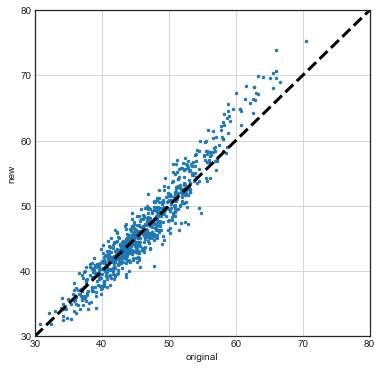

In [51]:
plt.style.use('seaborn-white')
plt.figure(figsize=(6,6))
plt.plot([30,80],[30,80],'--',c='k',lw=3)
plt.scatter(pdf.ovr_og,pdf.ovr_mn,s=6)
plt.xlabel('original')
plt.ylabel('new')
plt.xlim(30,80)
plt.ylim(30,80)
plt.grid(True)
#pdf.sort_values(['diffr'],0,False)

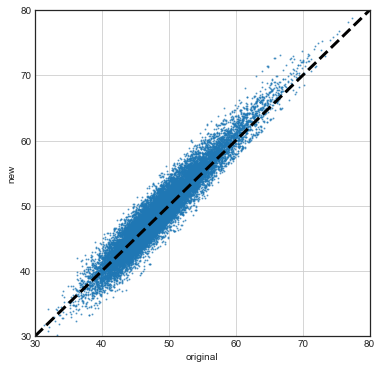

In [52]:
if True:
    plt.figure(figsize=(6,6))
    plt.plot([30,80],[30,80],'--',c='k',lw=3)
    plt.scatter((y @ nc2)/nc2.sum(),(y @ nc)/nc.sum(),s=1,alpha=0.6)
    plt.xlabel('original')
    plt.ylabel('new')
    plt.xlim(30,80)
    plt.ylim(30,80)
    plt.grid(True)
    #pdf.sort_values(['diffr'],0,False)


In [53]:
len(player_composites),len(player_names),len(ratings)

(1094, 1094, 1094)

In [54]:
#fexp3 = preprocessing.PolynomialFeatures(degree=2,interaction_only=True)
scalerX3 = preprocessing.RobustScaler()
scalery3 = preprocessing.StandardScaler()
prescale_X3 = scalerX3.fit_transform(ratings)
prescale_y3 = scalery3.fit_transform(player_composites)
#prescale_X3 = fexp3.fit_transform(prescale_X3)

clf3= multioutput.MultiOutputRegressor(linear_model.ElasticNet(positive=False,alpha=3e-3,l1_ratio=.8,fit_intercept=False))
clf3.fit(prescale_X3,prescale_y3)
yt3 = scalery3.inverse_transform(clf3.predict(prescale_X3))
err3 = np.linalg.norm(yt3-player_composites)
err3

2888.5351683704016

In [55]:
dkeys 
for i,c in enumerate(compNames):
    coeffs = clf3.estimators_[i].coef_ 
    v = np.argsort(abs(coeffs))[::-1]
    #print('\n',c)
    coeffs2 = [(coeffs[i2]/coeffs.max(),dkeys[i2]) for i2 in v[:90]]
    print('\n| {} |  |'.format(c[1:]))
    print('|----------|-------|')
    for v,n in sorted(coeffs2,reverse=True):
        if abs(v) < 0.1:
            continue
        print('|{:10s}|{:.1f}|'.format(n,10*v))


| Usage |  |
|----------|-------|
|ins       |10.0|
|fg        |3.7|
|spd       |1.6|
|oiq       |1.6|
|hgt       |-1.1|
|tp        |-1.3|
|reb       |-2.0|
|endu      |-2.4|

| Passing |  |
|----------|-------|
|pss       |10.0|
|ins       |8.5|
|oiq       |5.8|
|fg        |2.4|
|spd       |1.5|
|endu      |-2.0|
|tp        |-2.3|
|stre      |-3.8|
|reb       |-4.4|

| Turnovers |  |
|----------|-------|
|ins       |10.0|
|ft        |9.2|
|endu      |6.4|
|drb       |4.8|
|reb       |3.4|
|pss       |3.3|
|spd       |1.5|
|jmp       |-5.9|
|fg        |-13.1|
|oiq       |-25.3|

| Rim |  |
|----------|-------|
|stre      |10.0|
|hgt       |3.8|
|drb       |3.2|
|endu      |3.0|
|spd       |2.1|
|ft        |-3.0|
|diq       |-3.0|
|jmp       |-5.1|
|ins       |-7.5|

| LowPost |  |
|----------|-------|
|stre      |10.0|
|hgt       |3.8|
|drb       |3.2|
|endu      |3.0|
|spd       |2.1|
|ft        |-3.0|
|diq       |-3.0|
|jmp       |-5.1|
|ins       |-7.5|

| MidRange |  |
|----------

In [56]:
ratings = 'ratings'
weights = 'weights'
t= {
        ratings: ["hgt", "spd", "drb", "dnk", "oiq"],
        weights: [1, 1, 1, 1, 1],
}
t2= {
        ratings: ['dnk','drb','ins','oiq','ft'],
        weights: [6,4,3,2,-3],
}
rmax = 6/max(t['weights'])
rmax2 = 6/max(t2['weights'])

In [57]:
print('| Feature | Proposed | Current |'.format(c[1:]))
print('|---------|----------|---------|')
for w,r in sorted([(w,r) for r,w in zip(t2['ratings'],t2['weights'])],reverse=True):
    current = ' '
    if r in t['ratings']:
        current = '{:.1f}'.format(t['weights'][t['ratings'].index(r)]*rmax)
    print('|{:12s}|{:.1f}| {} |'.format(r,w*rmax2,current))
for w,r in sorted([(w,r) for r,w in zip(t['ratings'],t['weights'])],reverse=True):
    current = ''
    if r in t2['ratings']:
        continue
    print('|{:12s}|{}| {:.1f} |'.format(r,' ',w*rmax))

| Feature | Proposed | Current |
|---------|----------|---------|
|dnk         |6.0| 6.0 |
|drb         |4.0| 6.0 |
|ins         |3.0|   |
|oiq         |2.0| 6.0 |
|ft          |-3.0|   |
|spd         | | 6.0 |
|hgt         | | 6.0 |
